## Combining Data With Pandas 

In the last mission, we worked with just one data set, the 2015 World Happiness Report, to explore data aggregation. However, it's very common in practice to work with more than one data set at a time.

To further work with, we will also introduce the dataset for 2016 and 2017

In [1]:
import pandas as pd
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2017 = pd.read_csv("World_Happiness_2017.csv")

happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

## Combining Dataframes with Concat Function 

We can srtart by exploring the pd.concat() function. The concat() function combines dataframes one of two ways:
- Axis=0 (Add up the rows)
- Axis=1 (Add up the columns)

For example, we can add up the dataset in 2015 and 2016 like this: 

In [2]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
print(head_2015)

   Year      Country  Happiness Score  Standard Error
0  2015  Switzerland            7.587         0.03411
1  2015      Iceland            7.561         0.04884
2  2015      Denmark            7.527         0.03328
3  2015       Norway            7.522         0.03880


In [3]:
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
print(head_2016)

       Country  Happiness Score  Year
0      Denmark            7.526  2016
1  Switzerland            7.509  2016
2      Iceland            7.501  2016


In [4]:
concat_axis0 = pd.concat([head_2015, head_2016])
index0 = concat_axis0.index
question1 = len(index0)
print(concat_axis0)

       Country  Happiness Score  Standard Error  Year
0  Switzerland            7.587         0.03411  2015
1      Iceland            7.561         0.04884  2015
2      Denmark            7.527         0.03328  2015
3       Norway            7.522         0.03880  2015
0      Denmark            7.526             NaN  2016
1  Switzerland            7.509             NaN  2016
2      Iceland            7.501             NaN  2016


C:\Users\pakhl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [7]:
concat_axis1 = pd.concat([head_2015,head_2016], axis = 1 )
index1 = concat_axis1.index
question2 = len(index1)
print(concat_axis1)

   Year      Country  Happiness Score  Standard Error      Country  \
0  2015  Switzerland            7.587         0.03411      Denmark   
1  2015      Iceland            7.561         0.04884  Switzerland   
2  2015      Denmark            7.527         0.03328      Iceland   
3  2015       Norway            7.522         0.03880          NaN   

   Happiness Score    Year  
0            7.526  2016.0  
1            7.509  2016.0  
2            7.501  2016.0  
3              NaN     NaN  


### Combining Dataframes with different shapes with concat function 

Note that because the Standard Error column didn't exist in head_2016, NaN values were created to signify those values are missing. By default, the concat function will keep ALL of the data, no matter if missing values are created.
<br>
<br>
Also, notice again the indexes of the original dataframes didn't change. If the indexes aren't meaningful, it can be better to reset them. This is especially true when we create duplicate indexes, because they could cause errors as we perform other data cleaning tasks.
<br>
<br>
Luckily, the concat function has a parameter, ignore_index, that can be used to clear the existing index and reset it in the result. Let's practice using it next.

In [6]:
concat_update_index = pd.concat([head_2015, head_2016], ignore_index=True)
print(concat_update_index)

       Country  Happiness Score  Standard Error  Year
0  Switzerland            7.587         0.03411  2015
1      Iceland            7.561         0.04884  2015
2      Denmark            7.527         0.03328  2015
3       Norway            7.522         0.03880  2015
4      Denmark            7.526             NaN  2016
5  Switzerland            7.509             NaN  2016
6      Iceland            7.501             NaN  2016


C:\Users\pakhl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


## Joining Dataframes with Merge function 

Next, we'll explore the pd.merge() function - a function that can execute high performance database-style joins. Note that unlike the concat function, the merge function only combines dataframes horizontally (axis=1) and can only combine two dataframes at a time.

In simple, it's a join function in SQL

In [8]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

merged = pd.merge(left=three_2015, right=three_2016, on='Country')
print(merged)

  Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Norway                 4    2015                 4    2016


By default the join is a inner join. We can choose to have a left or right join as well:

In [9]:
merged_left = pd.merge(left=three_2015, right=three_2016, on='Country', how='left')
print(merged_left)

   Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Denmark                 3    2015               NaN     NaN
1   Norway                 4    2015               4.0  2016.0
2   Canada                 5    2015               NaN     NaN


You may have also noticed above that the merge function added a suffix of either _x or _y to columns of the same name to distinguish between them.

In [11]:
merged_suffixes = pd.merge(left=three_2015, right=three_2016,  on='Country', how='left',suffixes = ('_2015', '_2016') )
print(merged_suffixes)

   Country  Happiness Rank_2015  Year_2015  Happiness Rank_2016  Year_2016
0  Denmark                    3       2015                  NaN        NaN
1   Norway                    4       2015                  4.0     2016.0
2   Canada                    5       2015                  NaN        NaN


### Join on index with the merge function 

There is another way to join dataframes on specific columns - on the index 
<br>
<br>
When we join on index, however, our result will contain only common indexes.

In [12]:
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merge_index = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016'))
print(merge_index)

  Country_2015  Happiness Rank_2015  Year_2015 Country_2016  \
2      Denmark                    3       2015      Iceland   
3       Norway                    4       2015       Norway   
4       Canada                    5       2015      Finland   

   Happiness Rank_2016  Year_2016  
2                    3       2016  
3                    4       2016  
4                    5       2016  


## Combine data and create visualization 

And now we can answer the original question: **Did world happiness increase, decrease, or stay about the same from 2015 to 2017?**

C:\Users\pakhl\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


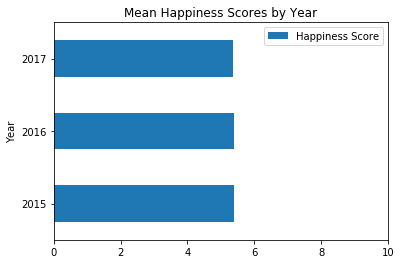

In [14]:
import numpy as np

happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

combined = pd.concat([happiness2015, happiness2016, happiness2017])
pivot_table_combined = combined.pivot_table('Happiness Score', 'Year', aggfunc=np.mean)
pivot_table_combined.plot(kind='barh', title = 'Mean Happiness Scores by Year', xlim=(0,10));